In [1]:
from google.colab import files
uploaded = files.upload()

Saving tmdb_5000_credits.csv to tmdb_5000_credits.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity


In [5]:
df_credits = pd.read_csv("tmdb_5000_credits.csv")
df_movies = pd.read_csv("tmdb_5000_movies.csv")

In [14]:
df_credits.columns = ['id', 'title', 'cast', 'crew']
df_movies = df_movies.merge(df_credits, on = 'id')
df_movies.head()

<ipython-input-14-53a836fd754e>:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'cast_x', 'crew_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_movies = df_movies.merge(df_credits, on = 'id')


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,crew_x,title_x,cast_y,crew_y,title_y,cast_x,crew_x,title,cast_y,crew_y
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter,"[{""cast_id"": 5, ""character"": ""John 

In [9]:
C = df_movies['vote_average'].mean()
M = df_movies['vote_count'].quantile(0.9)
print('C: ',C)
print('M: ',M)


C:  6.092171559442016
M:  1838.4000000000015


In [11]:
new_df_movies = df_movies.copy().loc[df_movies['vote_count']>=M]
print(new_df_movies.shape)

(481, 29)


In [12]:
def weighted_rating(X , C=C, M=M):
  V = X['vote_count']
  R = X['vote_average']
  return (V/(V+M)*R + (M/(V+M)*C))
  new_df_movies['score'] = new_df_movies.apply(weighted_rating, axis=1)
  new_df_movies = new_df_movies.sort_values('score', ascending = False)
  new_df_movies[["title", "vote_count", "vote_average", "score"]].head(10)

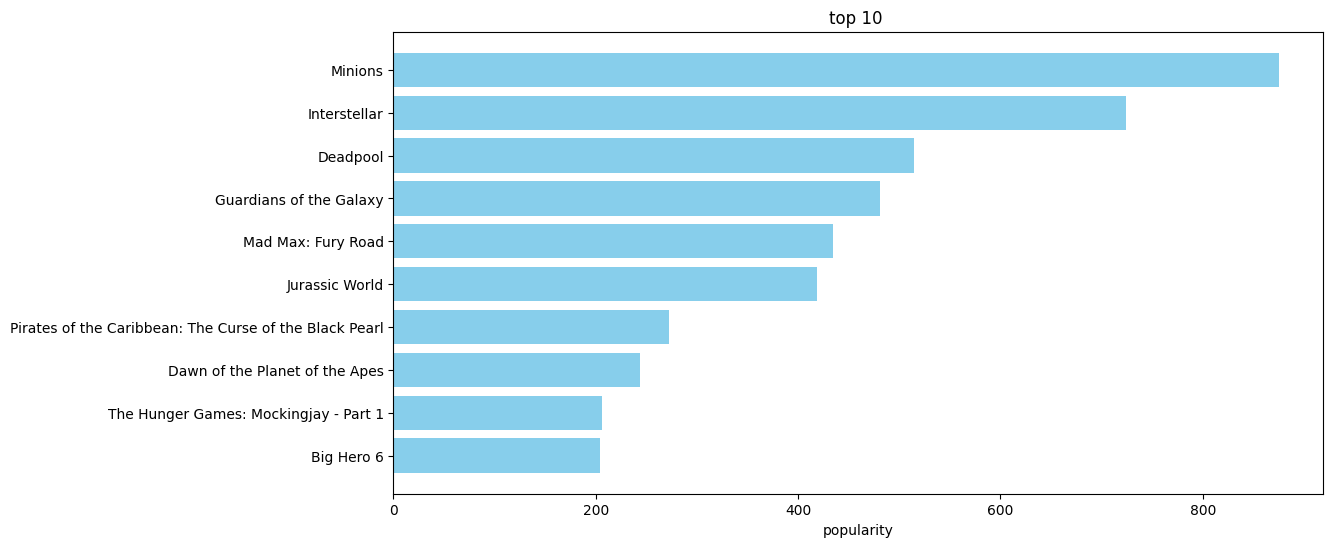

In [15]:
def plot():
  popularity = df_movies.sort_values('popularity', ascending= False)
  plt.figure(figsize=(12,6))
  plt.barh(popularity["original_title"].head(10), popularity["popularity"].head(10), align="center", color='skyblue')
  plt.gca().invert_yaxis()
  plt.title("top 10 ")
  plt.xlabel('popularity')
  plt.show()
plot()


In [16]:
print(df_movies["overview"].head(5))
tfidf = TfidfVectorizer(stop_words = "english")
df_movies["overview"] = df_movies["overview"].fillna("")
tfidf_matrix = tfidf.fit_transform(df_movies["overview"])
print(tfidf_matrix.shape)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object
(4803, 20978)


In [17]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)
indices = pd.Series(df_movies.index, index=df_movies["title"]).drop_duplicates()
print(indices.head())

(4803, 4803)
title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64


In [18]:
def get_recommendations(title, cosine_sim=cosine_sim):
  idx=indices[title]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:11]
  movies_indices = [ind[0] for ind in sim_scores]
  movies = df_movies["title"].iloc[movies_indices]
  return movies

In [19]:
print("content based filtering plot")
print()
print("recommendation for The Dark Knight RIses")
print(get_recommendations("The Dark Knight Rises"))
print(" recommendation for The Avengers")
print(get_recommendations("The Avengers"))


content based filtering plot

recommendation for The Dark Knight RIses
65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object
 recommendation for The Avengers
7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        S

In [20]:
features = ["cast_x", "crew_x", "genres", "keywords"]
for feature in features:
  df_movies[feature] = df_movies[feature]
df_movies[features].head(10)

,cast_x,cast_x,crew_x,crew_x,genres,keywords
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
5,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...","[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[{""id"": 851, ""name"": ""dual identity""}, {""id"": ..."
6,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de...","[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,..."
7,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ..."
8,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n..."
9,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de...","[{""credit_id"": ""553bf23692514135c8002886"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002..."
